In [23]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
!pip install xgboost

In [25]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Display basic information
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

First few rows:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0             

In [26]:
data.drop("id",inplace=True,axis=1)

Unique Value
 [1 0]
Value Counts
 stroke
0    4861
1     249
Name: count, dtype: int64


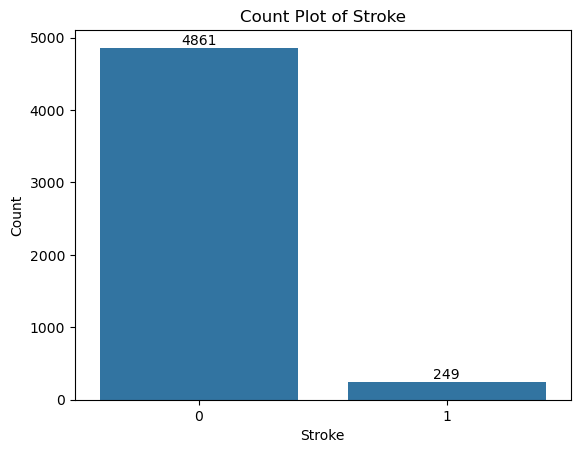

In [27]:
print('Unique Value\n', data['stroke'].unique())
print('Value Counts\n', data['stroke'].value_counts())

ax = sns.countplot(data=data, x='stroke')

# Iterate through the bars and add the count
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{int(height)}',
            ha='center', va='bottom')

plt.title('Count Plot of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [28]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


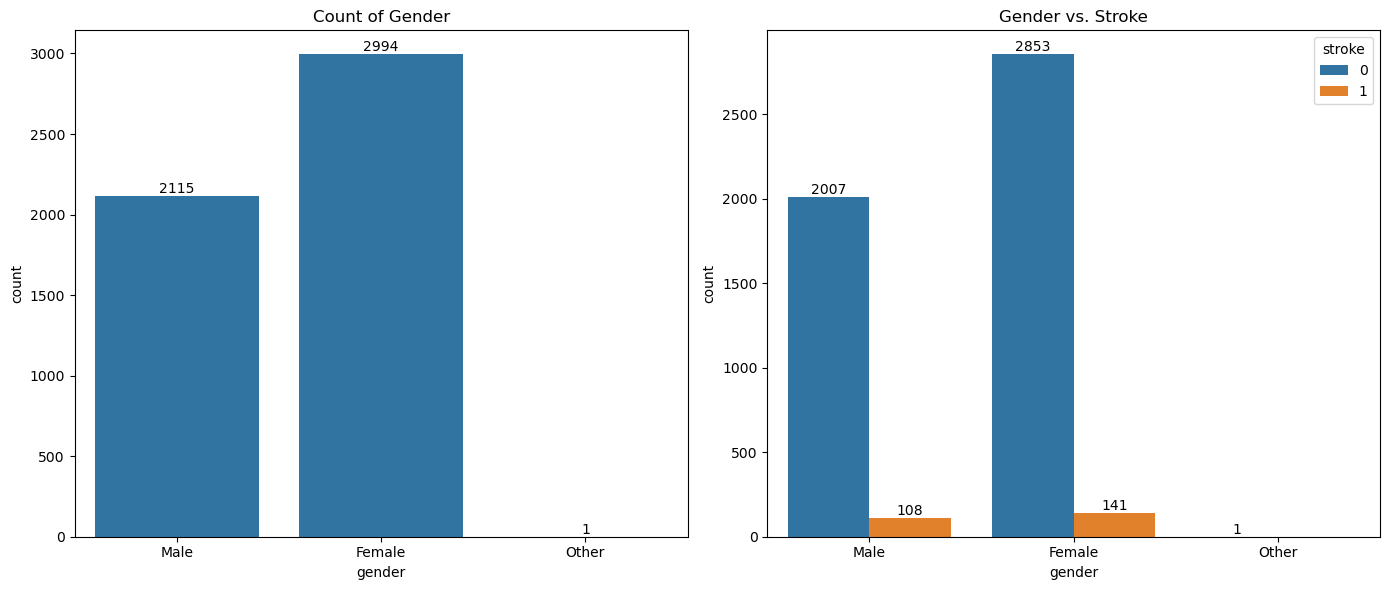

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=data, x='gender', ax=axes[0])
axes[0].set_title('Count of Gender')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')


sns.countplot(data=data, x='gender', hue='stroke', ax=axes[1])
axes[1].set_title('Gender vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


print('Unique values\n', data['gender'].unique())
print('Value Counts\n', data['gender'].value_counts())

Number of unique ages: 104


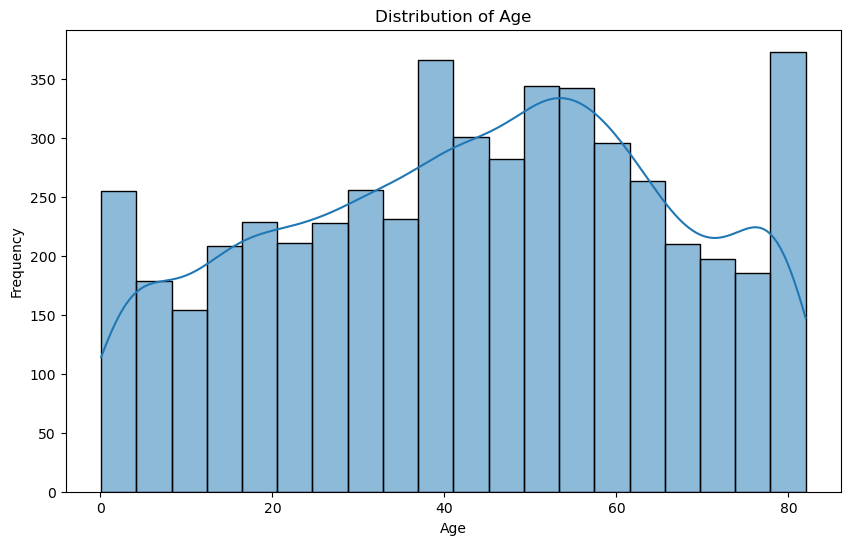

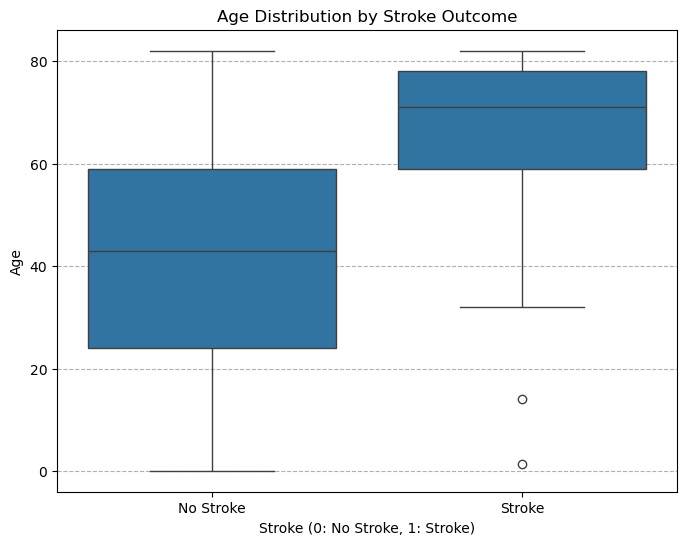

In [30]:
print(f"Number of unique ages: {data['age'].nunique()}")

# Distribution plot of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of age vs. stroke
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='stroke', y='age')
plt.title('Age Distribution by Stroke Outcome')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])  # Improve x-axis labels
plt.grid(True, axis='y', linestyle='--')  # Add a subtle grid for better readability
plt.show()

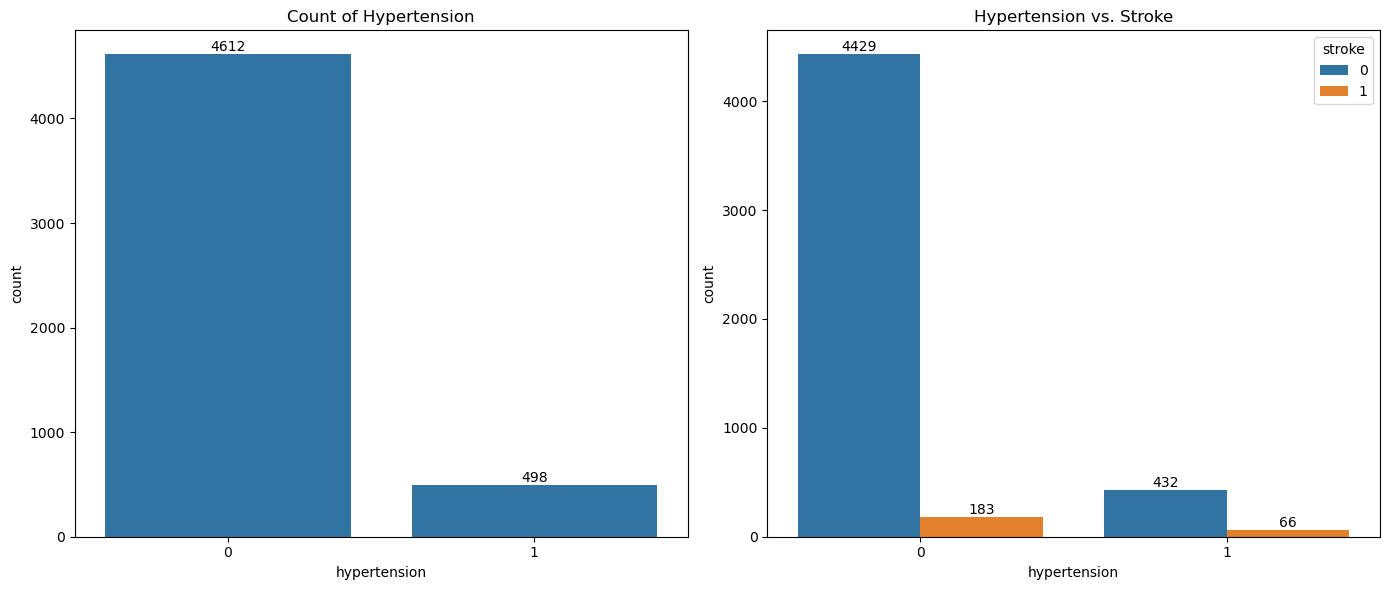

Unique values
 [0 1]
Value Counts
 hypertension
0    4612
1     498
Name: count, dtype: int64


In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Count of Hypertension
sns.countplot(data=data, x='hypertension', ax=axes[0])
axes[0].set_title('Count of Hypertension')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')

# Plot 2: Hypertension vs. Stroke
sns.countplot(data=data, x='hypertension', hue='stroke', ax=axes[1])
axes[1].set_title('Hypertension vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Unique values\n', data['hypertension'].unique())
print('Value Counts\n', data['hypertension'].value_counts())

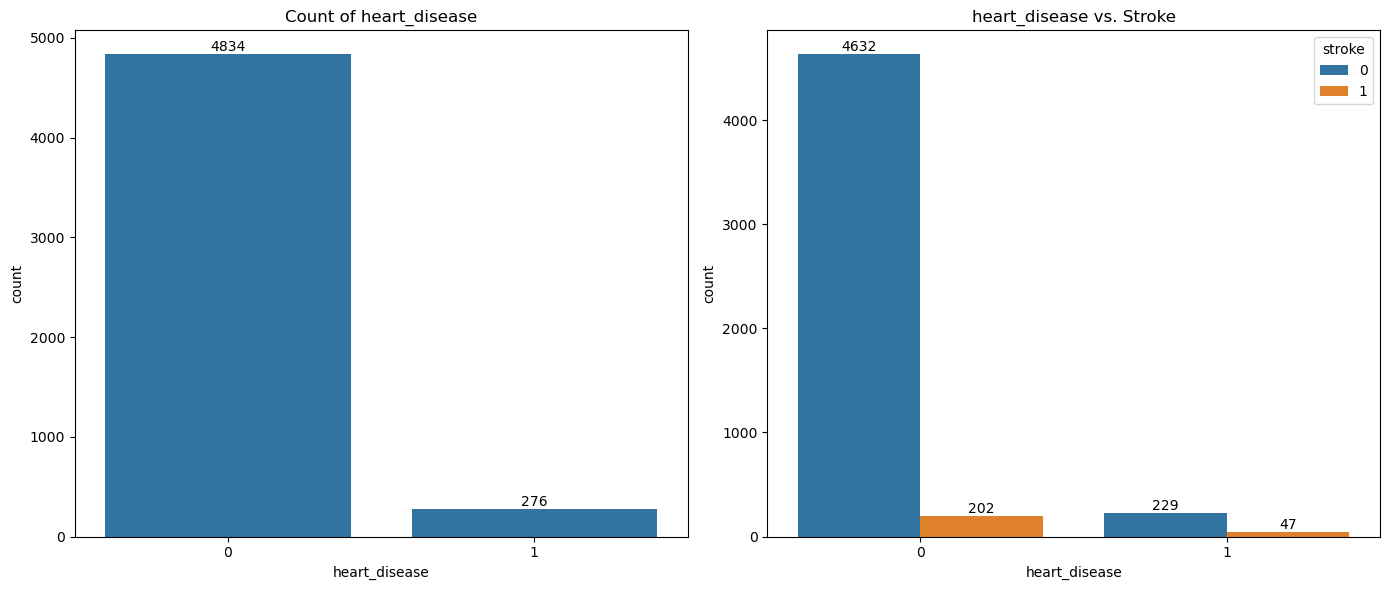

Unique values
 [1 0]
Value Counts
 heart_disease
0    4834
1     276
Name: count, dtype: int64


In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Plot 1: Count of heart_disease
sns.countplot(data=data, x='heart_disease', ax=axes[0])
axes[0].set_title('Count of heart_disease')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')

# Plot 2: heart_disease vs. Stroke
sns.countplot(data=data, x='heart_disease', hue='stroke', ax=axes[1])
axes[1].set_title('heart_disease vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Unique values\n', data['heart_disease'].unique())
print('Value Counts\n', data['heart_disease'].value_counts())

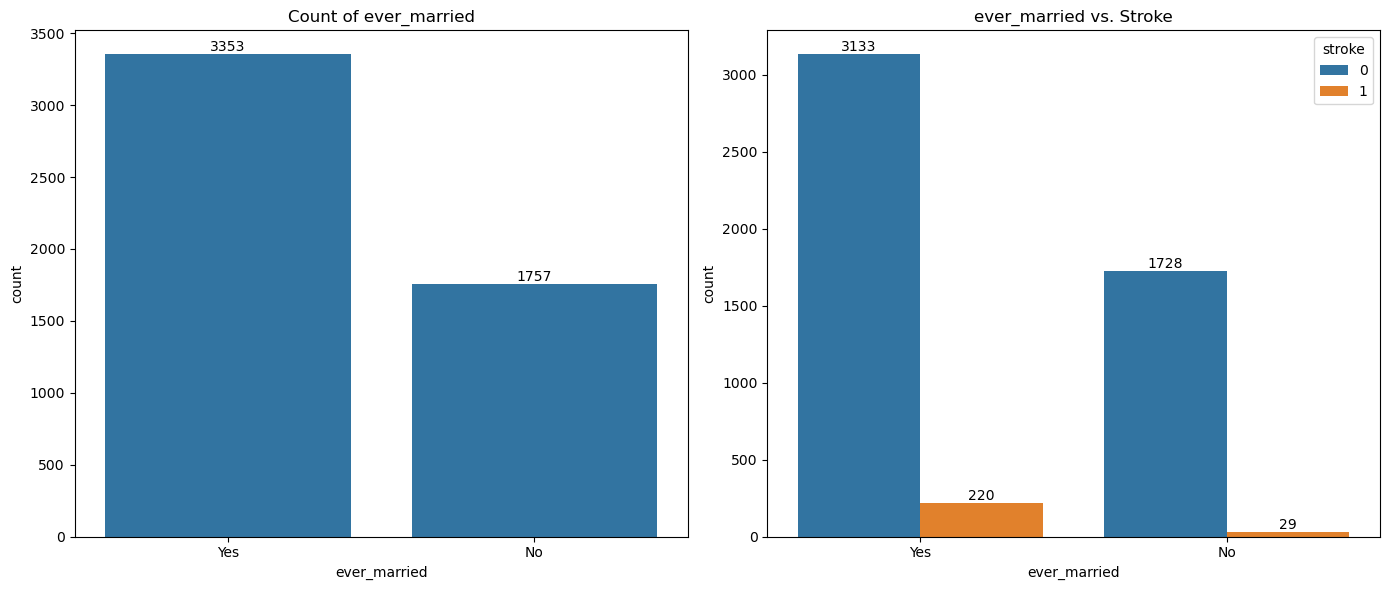

Unique values
 ['Yes' 'No']
Value Counts
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figure size for better readability

# Plot 1: Count of ever_married
sns.countplot(data=data, x='ever_married', ax=axes[0])
axes[0].set_title('Count of ever_married')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')

# Plot 2: ever_married vs. Stroke
sns.countplot(data=data, x='ever_married', hue='stroke', ax=axes[1])
axes[1].set_title('ever_married vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Unique values\n', data['ever_married'].unique())
print('Value Counts\n', data['ever_married'].value_counts())

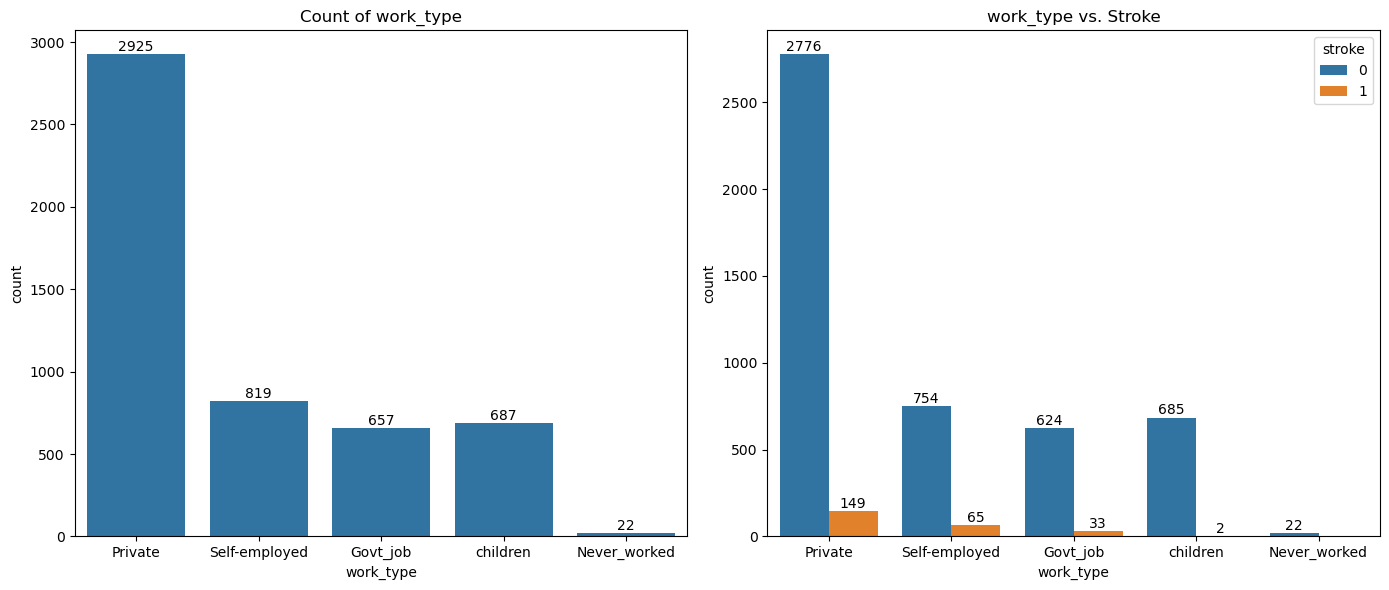

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figure size for better readability

# Plot 1: Count of work_type
sns.countplot(data=data, x='work_type', ax=axes[0])
axes[0].set_title('Count of work_type')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')

# Plot 2: work_type vs. Stroke
sns.countplot(data=data, x='work_type', hue='stroke', ax=axes[1])
axes[1].set_title('work_type vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Unique values\n', data['work_type'].unique())
print('Value Counts\n', data['work_type'].value_counts())

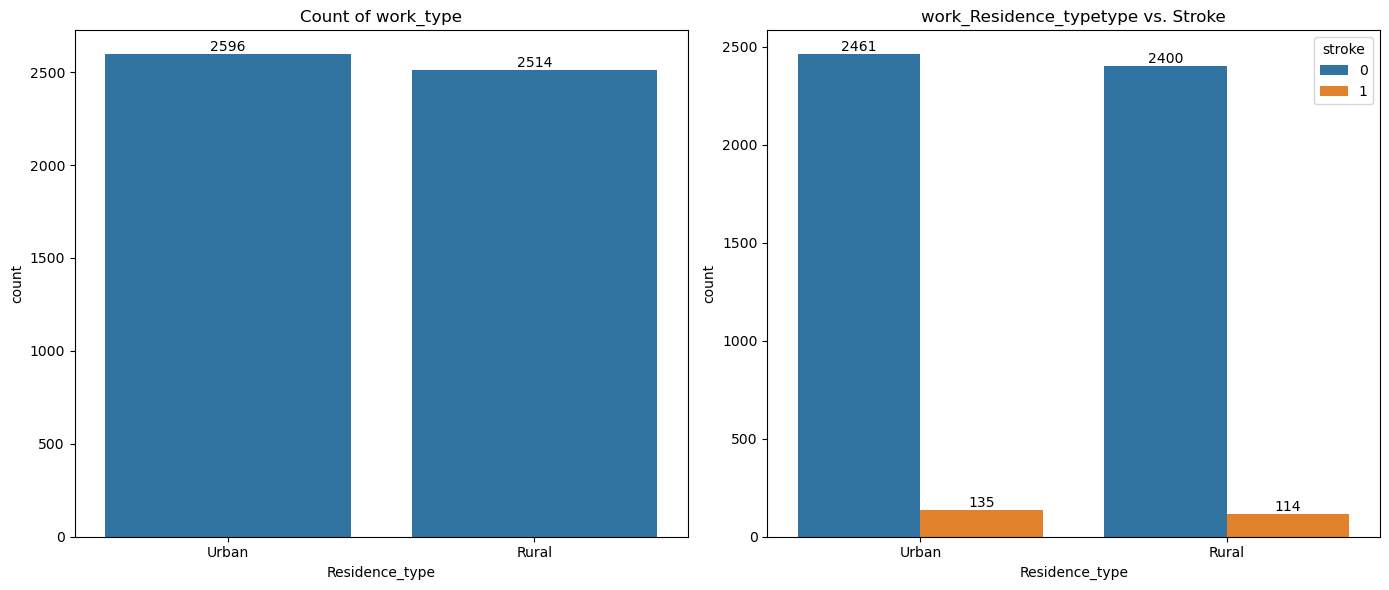

Unique values
 ['Urban' 'Rural']
Value Counts
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figure size for better readability

# Plot 1: Count of Residence_type
sns.countplot(data=data, x='Residence_type', ax=axes[0])
axes[0].set_title('Count of work_type')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')

# Plot 2: Residence_type vs. Stroke
sns.countplot(data=data, x='Residence_type', hue='stroke', ax=axes[1])
axes[1].set_title('work_Residence_typetype vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Unique values\n', data['Residence_type'].unique())
print('Value Counts\n', data['Residence_type'].value_counts())

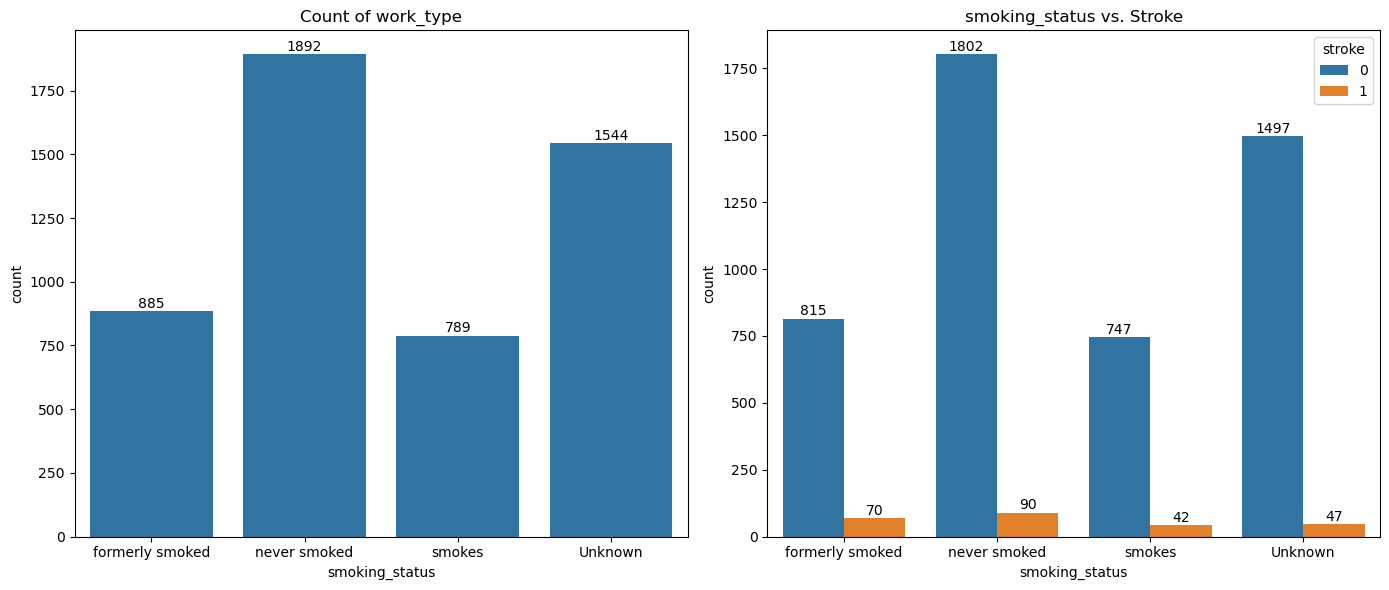

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Adjust figure size for better readability

# Plot 1: Count of smoking_status
sns.countplot(data=data, x='smoking_status', ax=axes[0])
axes[0].set_title('Count of work_type')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{int(height)}',
                ha='center', va='bottom')

# Plot 2: smoking_status vs. Stroke
sns.countplot(data=data, x='smoking_status', hue='stroke', ax=axes[1])
axes[1].set_title('smoking_status vs. Stroke')
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{int(height)}',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

print('Unique values\n', data['smoking_status'].unique())
print('Value Counts\n', data['smoking_status'].value_counts())

Number of unique avg_glucose_level: 3979


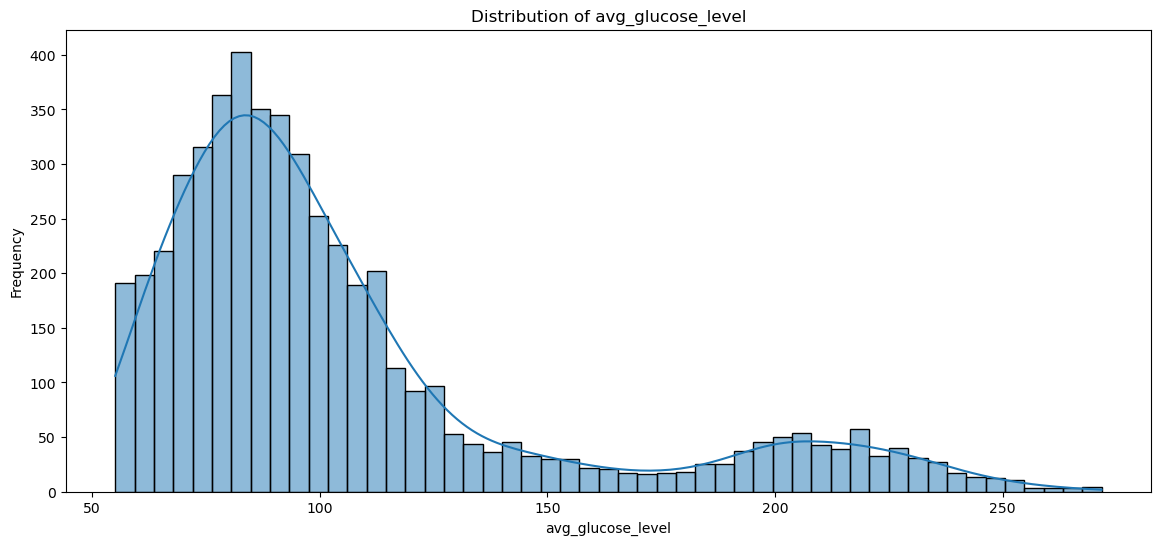

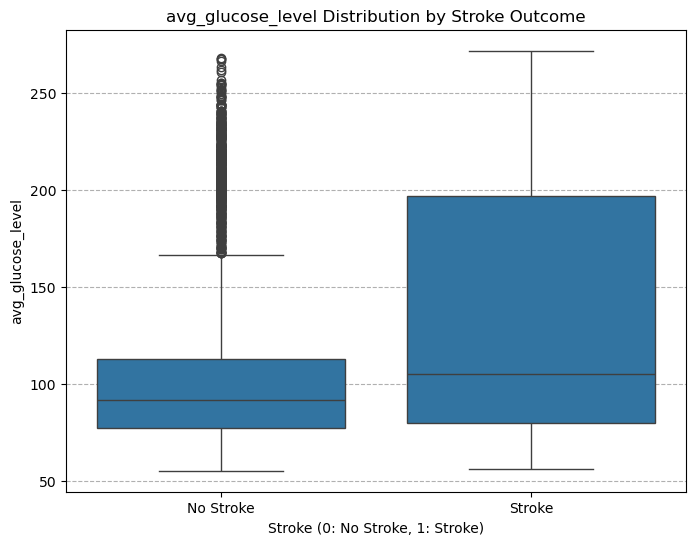

In [37]:
print(f"Number of unique avg_glucose_level: {data['avg_glucose_level'].nunique()}")

# Distribution plot of avg_glucose_level
plt.figure(figsize=(14, 6))
sns.histplot(data['avg_glucose_level'], kde=True)  # Using histplot for better control and adding KDE
plt.title('Distribution of avg_glucose_level')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()

# Box plot of avg_glucose_level vs. stroke
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='stroke', y='avg_glucose_level')
plt.title('avg_glucose_level Distribution by Stroke Outcome')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('avg_glucose_level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])  # Improve x-axis labels
plt.grid(True, axis='y', linestyle='--')  # Add a subtle grid for better readability
plt.show()

In [38]:
print(data['bmi'].isna().sum())
# Filling null values with average value
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
# Distribution plot of bmi
data['bmi'].nunique()

201


419

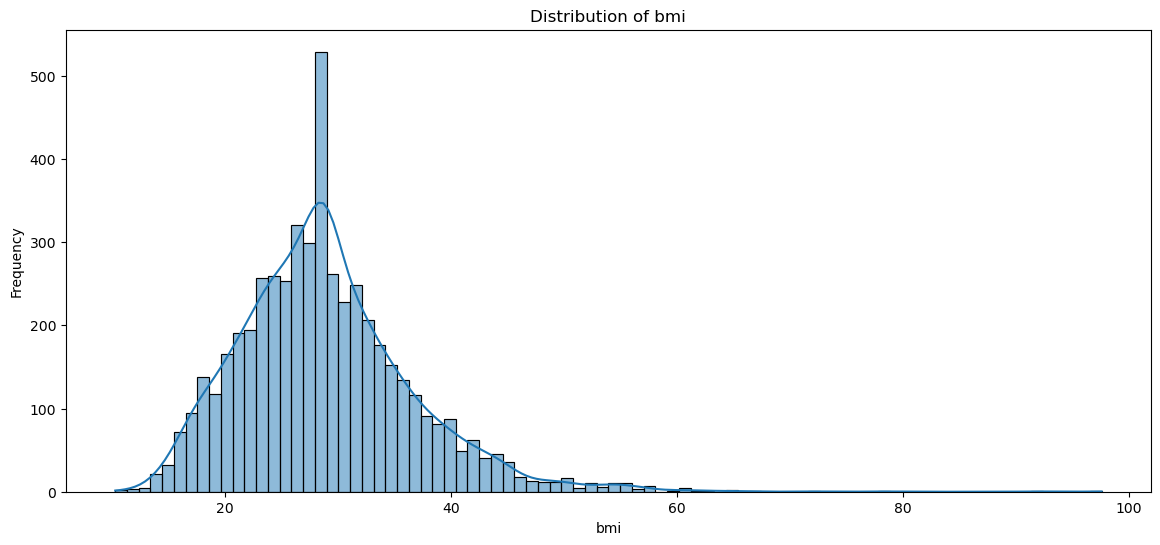

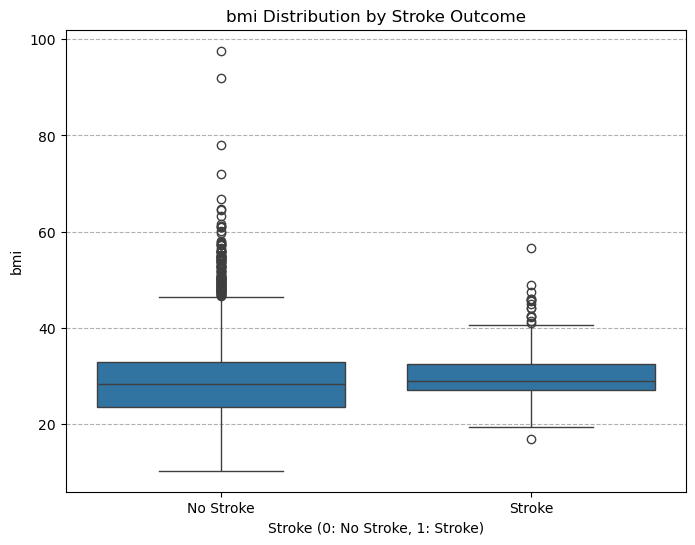

In [39]:
plt.figure(figsize=(14, 6))
sns.histplot(data['bmi'], kde=True)  # Using histplot for better control and adding KDE
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

# Box plot of bmi vs. stroke
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='stroke', y='bmi')
plt.title('bmi Distribution by Stroke Outcome')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('bmi')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])  # Improve x-axis labels
plt.grid(True, axis='y', linestyle='--')  # Add a subtle grid for better readability
plt.show()

In [40]:
cols=data.select_dtypes(include=['object']).columns
print(cols)
le=LabelEncoder()
data[cols]=data[cols].apply(le.fit_transform)
print(data.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0         

<Axes: >

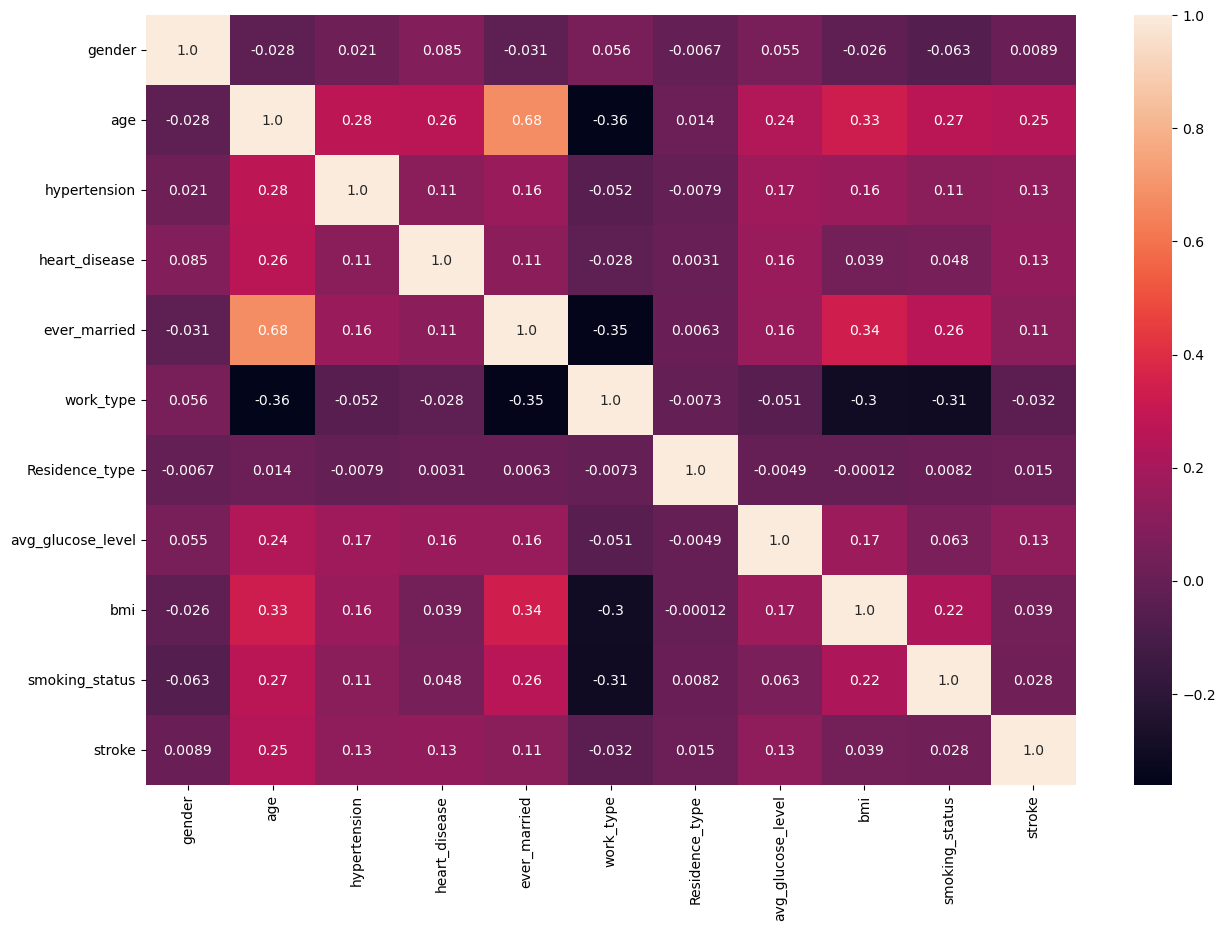

In [41]:
#Correlation

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [42]:
#Variables that are showing some effective correlation are:

#age, hypertension, heart_disease, ever_married, avg_glucose_level.

In [43]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In [44]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

NameError: name 'train_x' is not defined

Class Distribution Before SMOTE:
Counter({0: 4861, 1: 249})

Class Distribution After SMOTE:
Counter({1: 4861, 0: 4861})
(7777, 10) (7777,) (1945, 10) (1945,)

====== Random Forest ======
Accuracy: 0.9491002570694087
F1 Score: 0.9497716894977168
AUC Score: 0.9904007401533175

Confusion Matrix:


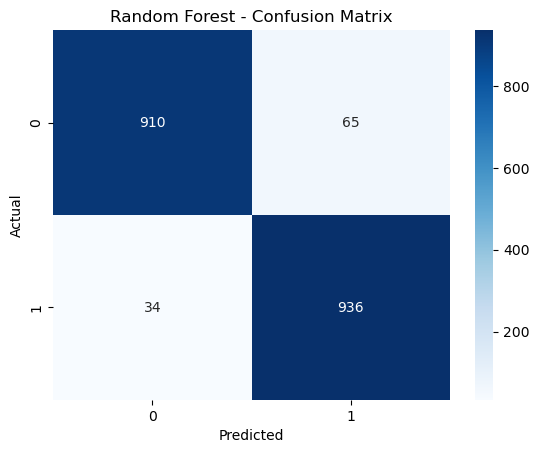


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.94      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



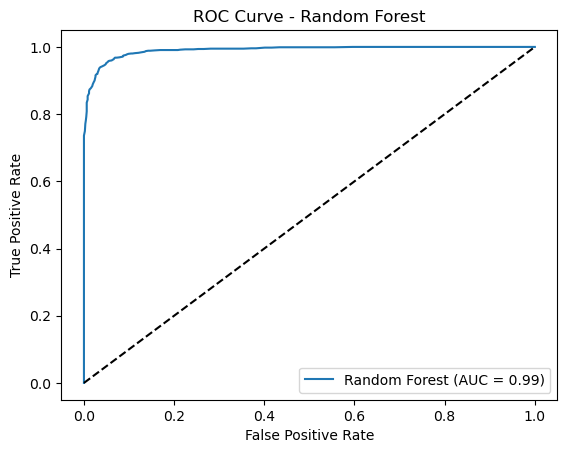


====== Logistic Regression ======
Accuracy: 0.8066838046272493
F1 Score: 0.8112449799196787
AUC Score: 0.8917335448057098

Confusion Matrix:


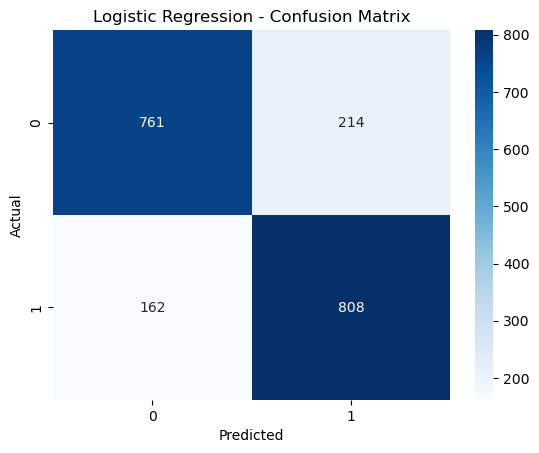


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       975
           1       0.79      0.83      0.81       970

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



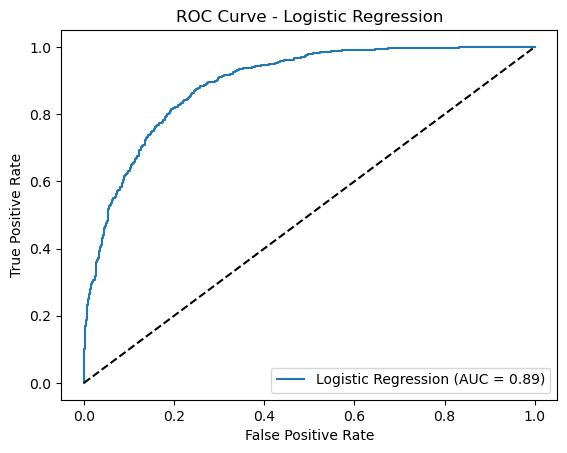


====== SVM ======
Accuracy: 0.8555269922879177
F1 Score: 0.8602685231228244
AUC Score: 0.9298969072164948

Confusion Matrix:


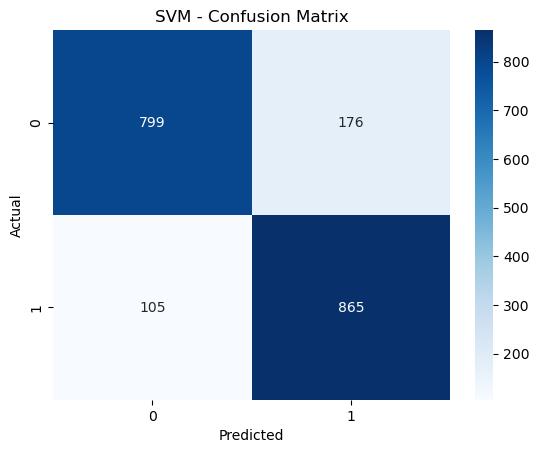


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       975
           1       0.83      0.89      0.86       970

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945



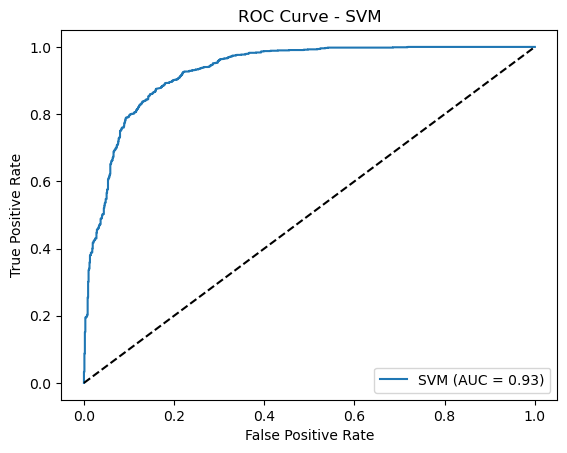

In [ ]:
X = data.drop('stroke', axis=1)
y = data['stroke']

# SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after SMOTE
print("Class Distribution Before SMOTE:")
print(Counter(y))
print("\nClass Distribution After SMOTE:")
print(Counter(y_resampled))

# Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODELS
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, class_weight='balanced', kernel='rbf', random_state=42)
}

# Add feature names during model training
feature_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 
                 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
X_train = pd.DataFrame(X_train_scaled, columns=feature_names)  # Convert array to DataFrame with names
X_test = pd.DataFrame(X_test_scaled, columns=feature_names)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n====== {name} ======")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()

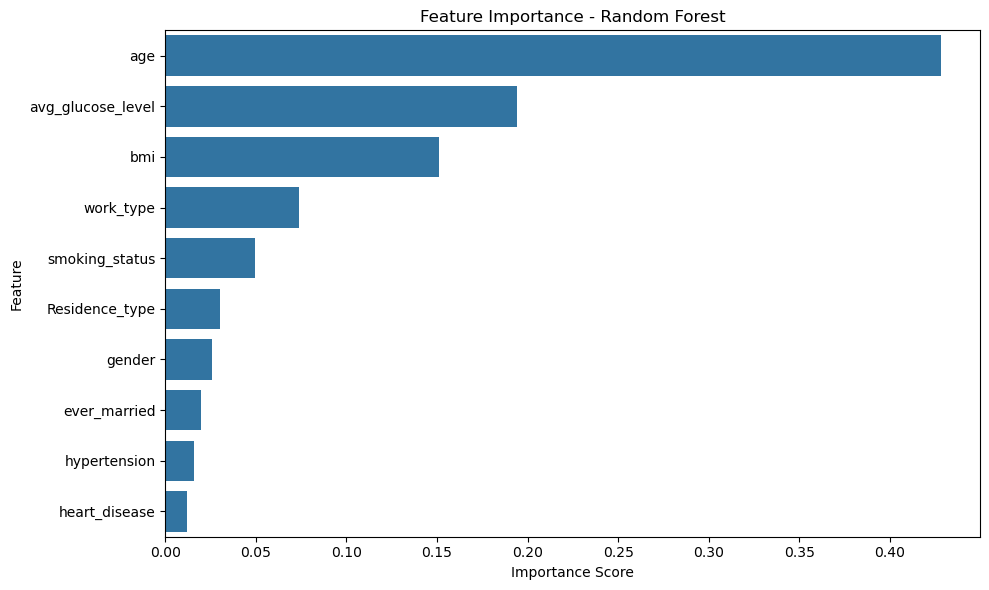

In [ ]:
rf_model = models['Random Forest']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the trained model
with open("RFModel0.pkl", "wb") as f:
    pickle.dump(rf_model, f)